In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.2.4 시계열 데이터

In [ ]:
import pandas as pd

train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Store Sales - Time Series Forecasting/train.csv")

print(train_data.shape)
train_data.head(10)

(1366721, 6)


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1.0,BABY CARE,0.0,0.0
2,2,2013-01-01,1.0,BEAUTY,0.0,0.0
3,3,2013-01-01,1.0,BEVERAGES,0.0,0.0
4,4,2013-01-01,1.0,BOOKS,0.0,0.0
5,5,2013-01-01,1.0,BREAD/BAKERY,0.0,0.0
6,6,2013-01-01,1.0,CELEBRATION,0.0,0.0
7,7,2013-01-01,1.0,CLEANING,0.0,0.0
8,8,2013-01-01,1.0,DAIRY,0.0,0.0
9,9,2013-01-01,1.0,DELI,0.0,0.0


In [ ]:
train_data.query("store_nbr==1 and family == 'AUTOMOTIVE'").head(10)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0
1782,1782,2013-01-02,1.0,AUTOMOTIVE,2.0,0.0
3564,3564,2013-01-03,1.0,AUTOMOTIVE,3.0,0.0
5346,5346,2013-01-04,1.0,AUTOMOTIVE,3.0,0.0
7128,7128,2013-01-05,1.0,AUTOMOTIVE,5.0,0.0
8910,8910,2013-01-06,1.0,AUTOMOTIVE,2.0,0.0
10692,10692,2013-01-07,1.0,AUTOMOTIVE,0.0,0.0
12474,12474,2013-01-08,1.0,AUTOMOTIVE,2.0,0.0
14256,14256,2013-01-09,1.0,AUTOMOTIVE,2.0,0.0
16038,16038,2013-01-10,1.0,AUTOMOTIVE,2.0,0.0


## Prophet Model 

### [그림 2-16] Prophet로 트렌드 및 요일별, 계절성 분석 화면

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Store Sales - Time Series Forecasting/train.csv")

df = train_data.query("store_nbr==1 and family == 'AUTOMOTIVE'").copy()
df = df[['date','sales']].copy()
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

df.head()

,ds,y
0,2013-01-01,0.0
1782,2013-01-02,2.0
3564,2013-01-03,3.0
5346,2013-01-04,3.0
7128,2013-01-05,5.0


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3opu9jry/i87_m75e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3opu9jry/cg9e8tc1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91142', 'data', 'file=/tmp/tmp3opu9jry/i87_m75e.json', 'init=/tmp/tmp3opu9jry/cg9e8tc1.json', 'output', 'file=/tmp/tmp1i6elmrh/prophet_model-20220917050149.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:01:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:01:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


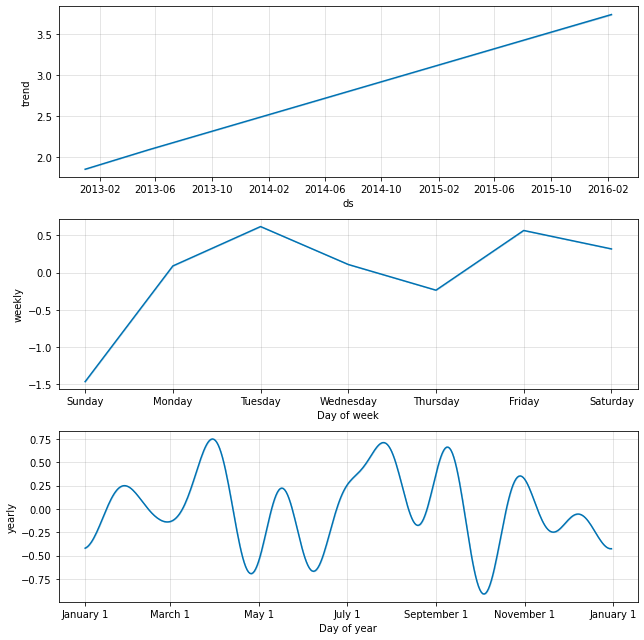

In [ ]:
# Python
from prophet import Prophet

m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

fig2 = m.plot_components(forecast)